## 알고리즘 결정을 위한 정확도 측정

[코드 참고] https://github.com/PacktPublishing/Mastering-Machine-Learning-for-Penetration-Testing


In [13]:
#Decision Tree

from sklearn import tree 
from sklearn.metrics import accuracy_score 
import numpy as np

training_data = np.genfromtxt('MLProject/dataset.csv', delimiter=',', dtype=np.int32)
inputs = training_data[:,:-1]
outputs = training_data[:, -1]

training_inputs = inputs[:2000] 
training_outputs = outputs[:2000] 
testing_inputs = inputs[2000:] 
testing_outputs = outputs[2000:]

classifier = tree.DecisionTreeClassifier()
classifier.fit(training_inputs, training_outputs)
predictions = classifier.predict(testing_inputs)
accuracy = 100.0 * accuracy_score(testing_outputs, predictions)
print ("The accuracy of your decision tree on testing data is: " + str(accuracy))

The accuracy of your decision tree on testing data is: 90.31474323578134


In [12]:
#Logistic Regression

from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

training_data = np.genfromtxt('MLProject/dataset.csv', delimiter=',', dtype=np.int32)
inputs = training_data[:,:-1]
outputs = training_data[:, -1]

training_inputs = inputs[:2000] 
training_outputs = outputs[:2000] 
testing_inputs = inputs[2000:] 
testing_outputs = outputs[2000:]



classifier = LogisticRegression()
classifier.fit(training_inputs, training_outputs)
predictions = classifier.predict(testing_inputs)
accuracy = 100.0 * accuracy_score(testing_outputs, predictions)
print ("The accuracy of your Logistic Regression on testing data is: " + str(accuracy))


The accuracy of your Logistic Regression on testing data is: 84.51684152401988


In [267]:
#SVM

from sklearn import *
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

training_data = np.genfromtxt('MLProject/dataset.csv', delimiter=',', dtype=np.int32)
inputs = training_data[:,:-1]
outputs = training_data[:, -1]

training_inputs = inputs[:2000] 
training_outputs = outputs[:2000] 
testing_inputs = inputs[2000:] 
testing_outputs = outputs[2000:]



classifier = svm.SVC()
classifier.fit(training_inputs, training_outputs)
predictions = classifier.predict(testing_inputs)
accuracy = 100.0 * accuracy_score(testing_outputs, predictions)
print ("The accuracy of your SVM on testing data is: " + str(accuracy))


The accuracy of your SVM on testing data is: 90.28161236885698


In [268]:
#Random Forest

from sklearn import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

training_data = np.genfromtxt('MLProject/dataset.csv', delimiter=',', dtype=np.int32)
inputs = training_data[:,:-1]
outputs = training_data[:, -1]

training_inputs = inputs[:2000] 
training_outputs = outputs[:2000] 
testing_inputs = inputs[2000:] 
testing_outputs = outputs[2000:]



classifier = RandomForestClassifier()
classifier.fit(training_inputs, training_outputs)
predictions = classifier.predict(testing_inputs)
accuracy = 100.0 * accuracy_score(testing_outputs, predictions)
print ("The accuracy of your Random Forest on testing data is: " + str(accuracy))


The accuracy of your Random Forest on testing data is: 92.70016565433463


## 모델 제작

[코드 참고]https://github.com/lsjsj92/machine_learning_basic/blob/master/007.%20machine%20learning%20ensemble%20-%20random%20forest.ipynb
[코드 참고2]https://github.com/chamanthmvs/Phishing-Website-Detection

In [11]:
import pandas as pd
from urllib.parse import urlparse,urlencode
import re
from bs4 import BeautifulSoup
import requests
import urllib.request
from datetime import datetime
import time
import socket
from urllib.error import HTTPError
from cython.parallel import prange


##

import tensorflow as tf
from tensorflow import keras


In [12]:
#데이터셋 읽어오기
#사용한 데이터 셋(https://archive.ics.uci.edu/ml/datasets/phishing+websites)
computer_raw_data = pd.read_csv("MLProject/1000-phishing.txt",header=None,names = ['urls'])
add_raw_data = pd.read_csv("MLProject/phishing_site_urls.csv",header=None, names = ['urls'])
#https://www.kaggle.com/taruntiwarihp/phishing-site-urls


In [13]:
cd = None
class FeatureExtraction:
    def __init__(self):
        pass
    
    #http, https 구분
    def getProtocol(self,url):
        return urlparse(url).scheme
    
    #domain 
    def getDomain(self,url):
        return urlparse(url).netloc
    
    #url 경로
    def getPath(self,url):
        return urlparse(url).path
    
    #IP 여부
    def havingIP(self,url):
        parse = urllib.parse.urlparse(url)
        #url 분석 (6개 tuple로 반환)
        #urllib.parse.urlparse(분석할 url, scheme(http), fragment(#뒤 인자) )
        domain = parse.netloc.split('.')
        #domain 부분을 string으로 저장
        
        #domain 부분이 ip주소라면 1, 아니라면 0
        try :
            int(domain[-1],0) #domain의 끝자리 정수변환
            return 1
        except ValueError : #변환 불가능 시
            return 0
        
    #url 길이 비교    
    def long_url(self,url):
        if len(url) < 54 : 
            return 0 #정상
        elif len(url) >= 54 and len(url) <=75: 
            return 2 #의심
        else: 
            return 1 #피싱
    
    #url에 @ 여부
    def have_at_symbol(self,url):
        if "@" in url:
            return 1 #피싱 
        else:
            return 0 #정상
        
    #redirection 여부   
    def redirection(self,url):
        if "//" in urlparse(url).path:
            return 1 #피싱
        else:
            return 0 #정상
        
    #- 여부
    def prefix_suffix_separation(self,url):
        if "-" in urlparse(url).netloc:
            return 1 #피싱
        else:
            return 0 #정상
        
    #서브 도메인 여부(.개수 3이상)
    def sub_domains(self,url):
        if url.count(".")<3:
            return 0 #정상
        elif url.count(".") == 3:
            return 2 #의심
        else:
            return 1 #피싱
        
    #단축 url -> 좀더 알아볼것
    def shortening_service(self,url):
        match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',url)
        if match:
            return 1
        else:
            return 0
        
        
        
    #google에 검색 되는지 여부    -> 더알아보기
    def google_index(self,url):
        user_agent = 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36'
        headers = { 'User-Agent' : user_agent}
        query = {'q': 'info:' + url}
        google = "https://www.google.com/search?" + urlencode(query)
        data = requests.get(google,headers=headers)
        data.encoding = 'ISO-8859-1'
        soup = BeautifulSoup(str(data.content), "html.parser")
        try:
            check = soup.find(id="rso").find("div").find("div").find("h3").find("a")
            if soup.find(id="rso").find("div").find("div").find("h3").find("a").find("href" != None):
                href = check['href']
                return 0
            else:
                return 1
        except AttributeError:
            return 1
        
    #url에 호스트명이 x
    def abnormal_url(self,url):
        dns = 0
        try:
            domain_name = whois.whois(urlparse(url).netloc)
        except:
            dns = 1
        
        if dns == 1:
            return 1
        else:
            hostname = domain_name.domain_name
            if hostname in url:
                return 0 
            else:
                return 1
        
        
    #웹트래픽 측정
    def web_traffic(self,url):
         #alexa 랭킹사이트 이용
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
        except TypeError:
            return 1
        except HTTPError:
            return 2
        rank= int(rank)
        if (rank<100000):
            return 0
        else:
            return 2
            
    #도메인 등록 길이
    def domain_registration_length(self,url):
        dns = 0
        try:
            #domain 정보 조회 whois.whois(조회할 url)
            domain_name = whois.whois(urlparse(url).netloc)
        except:
            dns = 1
            
        if dns == 1:
            return 1 #피싱
        else:
            #도메인 만료 날짜
            expiration_date = domain_name.expiration_date
            #시간을 연-월-일(문자열) 형식으로 출력
            today = time.strftime('%Y-%m-%d')
            #문자열을 datetime으로
            today = datetime.strptime(today,'%Y-%m-%d')
            
            if expiration_date is None:
                return 1
            #만약 리스트 타입일 경우 한개의 값을 추출할수 없음. 그러므로 의심이 가는 웹사이트로 간주됨.
            elif type(expiration_date) is list or type(today) is list:
                return 2
            else:
                #도메인 생성 날짜
                creation_date = domain_name.creation_date
                expiration_date = domain_name.expiration_date
                #도메인 생성/만료 날짜 중 하나가 string 형식이라면
                if(isinstance(creation_date,str) or isinstance(expiration_date,str)):
                    try:
                        #문자열을 datetime으로 바꾸기
                        creation_date = datetime.strptime(creation_date,'%Y-%m-%d')                        
                        expiration_date = datetime.strptime(expiratioon_date,'%Y-%m-%d')
                    except:
                        return 2 #의심
                #등록 길이 = 절댓값(만료날짜 - 현재)
                registration_length = abs((expiration_date - today).days)
                if registration_length / 365 <=1 :
                    return 1 #피싱
                else:
                    return 0 #정상
    
    #도메인 나이
    def age_domain(self,url):
        dns = 0
        try:
            domain_name = whois.whois(urlparse(url).netloc)
        except:
            dns = 1
            
        if dns == 1:
            return 1
        else :
            creation_date = domain_name.creation_date
            expiration_date = domain_name.expiration_date
            if(isinstance(creation_date,str) or isinstance(expiration_date,str)):
                try:
                    creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
                    expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
                except:
                    return 2
            if ((expiration_date is None) or (creation_date is None)):
                return 1
            elif((type(expiration_date) is list) or (type(creation_date) is list)) :
                return 2
            else:
                ageofdomain = abs((expiration_date - creation_date).days)
                if ((ageofdomain/30) < 6):
                    return 1
                else:
                    return 0
    #DNS 기록 (Domain Name Service / IP에 대한 이름을 대신해줌)            
    def dns_record(self,url):
        dns = 0
        try:
            domain_name = whois.whois(urlparse(url).netloc)
        except:
            dns = 1
        
        if dns == 1:
            return 1
        else:
            return 0
    
    #통계보고서 기반 구분 -> 더 알아보기
    def statistical_report(self,url):
        hostname = url
        h = [(x.start(0),x.end(0)) for x in re.finditer('https://|http://|www.|https://www.|http://www.', hostname)]
        z = int(len(h))
        if z != 0:
            y = h[0][1]
            hostname = hostname[y:]
            h = [(x.start(0),x.end(0)) for x in re.finditer('/', hostname)]
            z = int(len(h))
            if z != 0:
                hostname = hostname[:h[0][0]]
        url_match = re.search('at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly',url)
        try:
            ip_address = socket.gethostbyname(hostname)
            ip_match = re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42',ip_address)  
        except:
            return 1
        
        if url_match:
            return 1
        else:
            return 0


    #http 토큰
    def https_token(self,url):
        #re.search 첫번째로 패턴을 찾으면 match 반환, 찾지 못하면 none 반환
        #여기선 url에서 https:// 나 http://를 찾을 때 match 반환
        match = re.search('https://|http://',url)
        try:
            #match 값이 0부터 시작하는지(http://가 맨처음에 오는지) 그리고
            #match 첫값이 none이 아닌지(http://가 없는지)
            if match.start(0)== 0 and match.start(0) is not None: 
                #url에 match된 문자열 끝부분부터 넣기
                url = url[match.end(0):]
                #http나 https가 또 발견된다면
                match = re.search('http|https',url)
                if match: 
                    return 1 #피싱
                else:
                    return 0 #정상
            else:
                return 1
        except:
            return 1 #피싱

In [5]:
# import sys, urllib, http, re
# from os.path import *

# def help():
#     print("Usage : python {0} [http://]ShortURL.co".format(basename(sys.argv[0])))
#     print("{0} Version 0.1".format(basename(sys.argv[0])[:-3]))

# def Convert(url):
#     print("Input URL : {0}".format(S_url))
# #     URL_Open = urllib.request.urlopen("http://api.longurl.org/v2/expand?url={0}".format(S_url))
#     Response = URL_Open.read()
#     print("Long URL : {0}".format(Response[56:-28]))
#     URL_Open.close()
    
# if __name__ == '__main__':
#     if len(sys.argv) == 2:
#         Convert(sys.argv[1])
#     else:
#         help()

Usage : python ipykernel_launcher.py [http://]ShortURL.co
ipykernel_launcher Version 0.1


In [56]:
protocol = []
domain = []
path = []
having_ip = []
len_url = []
having_at_symbol = []
redirection_symbol = []
prefix_suffix_separation = []
sub_domains = []
tiny_url = []
abnormal_url = []
web_traffic = []
domain_registration_length = []
dns_record = []
statistical_report = []
age_domain = []
http_tokens = []
google_index = []

In [57]:
fe = FeatureExtraction()
rows = len(computer_raw_data["urls"])
print(rows)
rows2 = len(add_raw_data["urls"])
print(rows2)

for i in range(0, rows):
    url = computer_raw_data["urls"][i]
    protocol.append(fe.getProtocol(url))
    path.append(fe.getPath(url))
    domain.append(fe.getDomain(url))
    having_ip.append(fe.havingIP(url))
    len_url.append(fe.long_url(url))
    having_at_symbol.append(fe.have_at_symbol(url))
    redirection_symbol.append(fe.redirection(url))
    prefix_suffix_separation.append(fe.prefix_suffix_separation(url))
    sub_domains.append(fe.sub_domains(url))
    #tiny_url.append(fe.shortening_service(url))
    #web_traffic.append(fe.web_traffic(url))
    domain_registration_length.append(fe.domain_registration_length(url))
    dns_record.append(fe.dns_record(url))
    #statistical_report.append(fe.statistical_report(url))
    age_domain.append(fe.age_domain(url))
    http_tokens.append(fe.https_token(url))
    #google_index.append(fe.google_index(url))
    abnormal_url.append(fe.abnormal_url(url))
    
for i in range(0, rows2):
    url = add_raw_data["urls"][i]
    protocol.append(fe.getProtocol(url))
    path.append(fe.getPath(url))
    domain.append(fe.getDomain(url))
    having_ip.append(fe.havingIP(url))
    len_url.append(fe.long_url(url))
    having_at_symbol.append(fe.have_at_symbol(url))
    redirection_symbol.append(fe.redirection(url))
    prefix_suffix_separation.append(fe.prefix_suffix_separation(url))
    sub_domains.append(fe.sub_domains(url))
    #tiny_url.append(fe.shortening_service(url))
    #web_traffic.append(fe.web_traffic(url))
    domain_registration_length.append(fe.domain_registration_length(url))
    dns_record.append(fe.dns_record(url))
    #statistical_report.append(fe.statistical_report(url))
    age_domain.append(fe.age_domain(url))
    http_tokens.append(fe.https_token(url))
    #google_index.append(fe.google_index(url))
    abnormal_url.append(fe.abnormal_url(url))

996
549346


In [58]:
label = []
print(rows+rows2)
for i in range(0,rows+rows2):
    label.clear()
for i in range(0,rows+rows2):
    label.append(1)

550342


In [59]:
d={'Protocol':pd.Series(protocol),'Domain':pd.Series(domain),'Path':pd.Series(path),'Having_IP':pd.Series(having_ip),
   'URL_Length':pd.Series(len_url),'Having_@_symbol':pd.Series(having_at_symbol),
   'Redirection_//_symbol':pd.Series(redirection_symbol),'Prefix_suffix_separation':pd.Series(prefix_suffix_separation),
   'Sub_domains':pd.Series(sub_domains),
   'domain_registration_length':pd.Series(domain_registration_length),'dns_record':pd.Series(dns_record),
   'age_domain':pd.Series(age_domain),'http_tokens':pd.Series(http_tokens),'abnormal_url':pd.Series(abnormal_url),
   'label':pd.Series(label)}
#'',web_traffic' : pd.Series(web_traffic) , 'statistical_report':pd.Series(statistical_report), 'google_index':pd.Series(google_index),,'tiny_url':pd.Series(tiny_url)
data1=pd.DataFrame(d)
data1

,Protocol,Domain,Path,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,domain_registration_length,dns_record,age_domain,http_tokens,abnormal_url,label
0,http,asesoresvelfit.com,/media/datacredito.co/,0,0,0,0,0,0,1,1,1,0,1,1
1,http,caixa.com.br.fgtsagendesaqueconta.com,/consulta8523211/principal.php,0,1,0,0,0,1,1,1,1,0,1,1
2,http,hissoulreason.com,/js/homepage/home/,0,0,0,0,0,0,1,1,1,0,1,1
3,http,unauthorizd.newebpage.com,/webapps/66fbf/,0,0,0,0,0,0,1,1,1,0,1,1
4,http,133.130.103.10,/23/,1,0,0,0,0,2,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550337,,,23.227.196.215/,0,0,0,0,0,2,1,1,1,1,1,1
550338,,,apple-checker.org/,0,0,0,0,0,0,1,1,1,1,1,1
550339,,,apple-iclods.org/,0,0,0,0,0,0,1,1,1,1,1,1
550340,,,apple-uptoday.org/,0,0,0,0,0,0,1,1,1,1,1,1


In [60]:
raw_data = pd.read_csv("MLProject/legitimate_urls.txt",header=None, names = ['urls'])
raw_data.head()

,urls
0,http://www.liquidgeneration.com/
1,http://www.onlineanime.org/
2,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...
3,http://www.galeon.com/kmh/
4,http://www.fanworkrecs.com/


In [20]:
len(raw_data["urls"])

1017

In [61]:
protocol = []
domain = []
path = []
having_ip = []
len_url = []
having_at_symbol = []
redirection_symbol = []
prefix_suffix_separation = []
sub_domains = []
tiny_url = []
abnormal_url = []
web_traffic = []
domain_registration_length = []
dns_record = []
statistical_report = []
age_domain = []
http_tokens = []
google_index = []

In [62]:
fe = FeatureExtraction()
rows = len(raw_data["urls"])
print(rows)


for i in range(0, rows):
    url = raw_data["urls"][i]
    protocol.append(fe.getProtocol(url))
    path.append(fe.getPath(url))
    domain.append(fe.getDomain(url))
    having_ip.append(fe.havingIP(url))
    len_url.append(fe.long_url(url))
    having_at_symbol.append(fe.have_at_symbol(url))
    redirection_symbol.append(fe.redirection(url))
    prefix_suffix_separation.append(fe.prefix_suffix_separation(url))
    sub_domains.append(fe.sub_domains(url))
    #tiny_url.append(fe.shortening_service(url))
    #web_traffic.append(fe.web_traffic(url))
    domain_registration_length.append(fe.domain_registration_length(url))
    dns_record.append(fe.dns_record(url))
    #statistical_report.append(fe.statistical_report(url))
    age_domain.append(fe.age_domain(url))
    http_tokens.append(fe.https_token(url))
    #google_index.append(fe.google_index(url))
    abnormal_url.append(fe.abnormal_url(url))

1017


In [63]:
label = []
for i in range(0,rows):
    label.clear()
for i in range(0,rows):
    label.append(0)

In [64]:
d={'Protocol':pd.Series(protocol),'Domain':pd.Series(domain),'Path':pd.Series(path), 'Having_IP':pd.Series(having_ip),
   'URL_Length':pd.Series(len_url),'Having_@_symbol':pd.Series(having_at_symbol),
   'Redirection_//_symbol':pd.Series(redirection_symbol),'Prefix_suffix_separation':pd.Series(prefix_suffix_separation),
   'Sub_domains':pd.Series(sub_domains),
   'domain_registration_length':pd.Series(domain_registration_length),'dns_record':pd.Series(dns_record),
   'age_domain':pd.Series(age_domain),'http_tokens':pd.Series(http_tokens),'abnormal_url':pd.Series(abnormal_url),
   'label':pd.Series(label)}
#,'web_traffic' : pd.Series(web_traffic) , 'statistical_report':pd.Series(statistical_report), 'google_index':pd.Series(google_index),tiny_url':pd.Series(tiny_url),
data2=pd.DataFrame(d)
data2

,Protocol,Domain,Path,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,domain_registration_length,dns_record,age_domain,http_tokens,abnormal_url,label
0,http,www.liquidgeneration.com,/,0,0,0,0,0,0,1,1,1,0,1,0
1,http,www.onlineanime.org,/,0,0,0,0,0,0,1,1,1,0,1,0
2,http,www.ceres.dti.ne.jp,/~nekoi/senno/senfirst.html,0,0,0,0,0,1,1,1,1,0,1,0
3,http,www.galeon.com,/kmh/,0,0,0,0,0,0,1,1,1,0,1,0
4,http,www.fanworkrecs.com,/,0,0,0,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,http,www.penguins.cl,/,0,0,0,0,0,0,1,1,1,0,1,0
1013,http,www.falklands.net,/,0,0,0,0,0,0,1,1,1,0,1,0
1014,http,englishnf.pinguins.info,/,0,0,0,0,0,0,1,1,1,0,1,0
1015,http,www.gdargaud.net,/antarctica/penguins.html,0,0,0,0,0,2,1,1,1,0,1,0


In [65]:
from sklearn.model_selection import train_test_split
y1 = data1['label'] #라벨
x1 = data1.drop('label',axis = 1) #열 1개 삭제


In [66]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3, random_state=100)
#클래스를 개별의 배열로 받는 경우
#(분할시킬 데이터, 테스트 데이터셋 비율 or 갯수 , 데이터 분할시 셔플이 이루어지기 위한 시드값 )

In [67]:
y2 = data2['label'] #라벨
x2 = data2.drop('label',axis = 1) #열 1개 삭제 (라벨)

In [68]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3, random_state=100)

In [69]:
x_train = pd.concat([x1_train,x2_train]) #두 데이터 행 연결

In [70]:
x_train

,Protocol,Domain,Path,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,domain_registration_length,dns_record,age_domain,http_tokens,abnormal_url
52525,,,www.intermoda.net/empresa/blusbor,0,0,0,0,0,0,1,1,1,1,1
252069,,,twitter.com/EliasKoteas,0,0,0,0,0,0,1,1,1,1,1
216884,,,movies.nytimes.com/movie/456467/Seeking-a-Frie...,0,1,0,0,0,0,1,1,1,1,1
191613,,,freepages.genealogy.rootsweb.ancestry.com/~dev...,0,2,0,0,0,1,1,1,1,1,1
532776,,,www.pasquaautonoleggi.it/988g765f,0,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,http,animaldiversity.ummz.umich.edu,/site/accounts/information/sula_nebouxii.html,0,1,0,0,0,1,1,1,1,0,1
871,http,www.stanford.edu,/group/stanfordbirds/text/essays/flamingo_feed...,0,1,0,0,0,2,1,1,1,0,1
835,http,www.birdlife.org,/datazone/species/index.html,0,1,0,0,0,1,1,1,1,0,1
792,http,www.apprenticeschool.com,,0,0,0,0,0,0,1,1,1,0,1


In [71]:
y_train = pd.concat([y1_train,y2_train])
y_train

52525     1
252069    1
216884    1
191613    1
532776    1
         ..
855       0
871       0
835       0
792       0
520       0
Name: label, Length: 385950, dtype: int64

In [72]:
y_test = pd.concat([y1_test,y2_test])
y_test

479425    1
218285    1
317346    1
272893    1
166844    1
         ..
433       0
427       0
661       0
278       0
218       0
Name: label, Length: 165409, dtype: int64

In [73]:
x_test = pd.concat([x1_test,x2_test])
x_test

,Protocol,Domain,Path,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,domain_registration_length,dns_record,age_domain,http_tokens,abnormal_url
479425,,,youtube.com/watch,0,0,0,0,0,0,1,1,1,1,1
218285,,,murderbydeath.bandcamp.com/,0,0,0,0,0,0,1,1,1,1,1
317346,,,doctoroogle.com/20488-tarzana-dentist-dr-randy...,0,2,0,0,0,0,1,1,1,1,1
272893,,,allinlondon.co.uk/directory/1065/72679.php,0,0,0,0,0,2,1,1,1,1,1
166844,,,disneyparksmobile.com/,0,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,http,ourworld.compuserve.com,/homepages/anithmi/cyclocke.htm,0,2,0,0,0,2,1,1,1,0,1
427,http,www.softshape.com,/cham/,0,0,0,0,0,0,1,1,1,0,1
661,http,universitycommunications.uvm.edu,/tour/,0,2,0,0,0,0,1,1,1,0,1
278,http,www.allvid.com,/,0,0,0,0,0,0,1,1,1,0,1


In [34]:
# x_train['tiny_url'].unique()

In [74]:
x_train.dtypes

Protocol                      object
Domain                        object
Path                          object
Having_IP                      int64
URL_Length                     int64
Having_@_symbol                int64
Redirection_//_symbol          int64
Prefix_suffix_separation       int64
Sub_domains                    int64
domain_registration_length     int64
dns_record                     int64
age_domain                     int64
http_tokens                    int64
abnormal_url                   int64
dtype: object

In [78]:
from sklearn import preprocessing 
  
# 문자를 정수형 숫자로 바꿔줌
label_encoder = preprocessing.LabelEncoder() 
#   
# species에 label 인코딩
x_train['Protocol']= label_encoder.fit_transform(x_train['Protocol']) 
x_train['Domain']= label_encoder.fit_transform(x_train['Domain']) 
x_train['Path']= label_encoder.fit_transform(x_train['Path']) 
# x_train.drop(['google_index','abnormal_url'],axis=1)

x_test['Protocol']= label_encoder.fit_transform(x_test['Protocol']) 
x_test['Domain']= label_encoder.fit_transform(x_test['Domain']) 
x_test['Path']= label_encoder.fit_transform(x_test['Path']) 
# x_test.drop(columns=['google_index' , 'abnormal_url'],axis=1) 

# x_train['Protocol'].unique()
x_train

,Protocol,Domain,Path,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,domain_registration_length,dns_record,age_domain,http_tokens,abnormal_url
52525,0,0,311664,0,0,0,0,0,0,1,1,1,1,1
252069,0,0,275172,0,0,0,0,0,0,1,1,1,1,1
216884,0,0,183912,0,1,0,0,0,0,1,1,1,1,1
191613,0,0,115831,0,2,0,0,0,1,1,1,1,1,1
532776,0,0,317619,0,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,263,42,2171,0,1,0,0,0,1,1,1,1,0,1
871,263,1029,1833,0,1,0,0,0,2,1,1,1,0,1
835,263,658,1748,0,1,0,0,0,1,1,1,1,0,1
792,263,633,0,0,0,0,0,0,0,1,1,1,0,1


In [77]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_trains=scaler.transform(x_train)
x_tests=scaler.transform(x_test)

array([[ -0.07709253,  -0.05437497,   1.46514611, ...,   0.        ,
          0.06185432,   0.        ],
       [ -0.07709253,  -0.05437497,   1.09502326, ...,   0.        ,
          0.06185432,   0.        ],
       [ -0.07709253,  -0.05437497,   0.16941184, ...,   0.        ,
          0.06185432,   0.        ],
       ...,
       [ 12.79980686,  15.65054427,  -1.67820024, ...,   0.        ,
        -16.16702   ,   0.        ],
       [ 12.79980686,  15.05385281,  -1.69592947, ...,   0.        ,
        -16.16702   ,   0.        ],
       [ 12.79980686,   5.45905412,  -1.68129373, ...,   0.        ,
        -16.16702   ,   0.        ]])

In [45]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators:결정트리의 개수. 많을수록 좋은 성능이 나올수도 있음. default = 10
#max_features:데이터 feature 참조 비율및 개수. auto.
#max_depth: 트리의 깊이
#max_leaf_nodes : 리프노드의 최대개수
rfc = RandomForestClassifier(n_estimators=1000,max_depth=10, max_leaf_nodes=10000)
rfc.fit(x_trains,y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=10000, n_estimators=1000)

In [46]:
y_pred_rfc = rfc.predict(x_test)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score

# rf_param_grid = { 'n_estimators' : [1000] , 'max_depth' : [1,3,5,10,15], 'max_leaf_nodes' : [1000] }
# rf_grid = GridSearchCV(rfc, param_grid = rf_param_grid, scoring = "accuracy", n_jobs = -1, verbose = 1)
# rf_grid.fit(x_train, y_train)
# cm_rfc = confusion_matrix(y_test,y_pred_rfc)
# print(cm_rfc)

print("Accuracy:")
print(100.0*accuracy_score(y_test,y_pred_rfc))
# print(rf_grid.best_params_)


Accuracy:
99.81500402033745


In [ ]:
# from joblib import dump, load
import pickle

#파일 저장
with open('model.pickle','wb') as f:
    pickle.dump(rfc, f, pickle.HIGHEST_PROTOCOL)
# pickle.dump(rfc, open('Model/my_randomforest_model.pkl','wb'))


In [51]:
feature_importances = rfc.feature_importances_

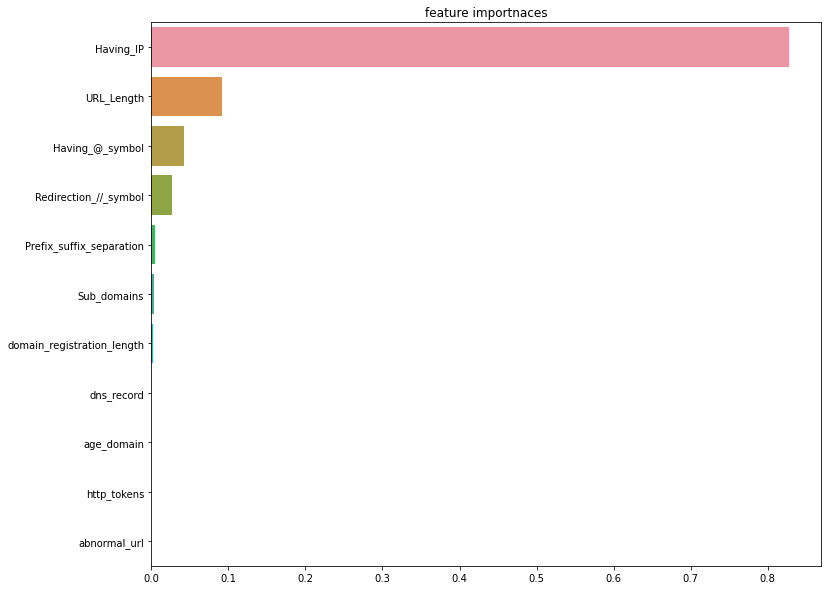

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

ft_importances = pd.Series(feature_importances, index = x_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importnaces")
sns.barplot(x=ft_importances, y =x_train.columns)
plt.show()

## 피클 저장

In [ ]:
model = pickle.load('model.pickle','rb')   

in_url = string(input('URL 입력:'))
